# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


Цель исследования -

 * Выяснить, сколько обычно занимает продажа.
 * Понять, какие факторы больше всего влияют на стоимость квартиры
 * Выделить населённые пункты с самой высокой и низкой стоимостью жилья
 * Выяснить, какая область входит в центр.
 * Выделить факторы, которые влияют на стоимость квартиры


Ход исследования

 * Обзор данных.
 * Предобработка данных.
 * Расчёты и добавление результатов в таблицу.
 * Исследовательский анализ данных

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span><ul class="toc-item"><li><span><a href="#Замена-на-0" data-toc-modified-id="Замена-на-0-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Замена на 0</a></span><ul class="toc-item"><li><span><a href="#Cтолбeц-is_apartment" data-toc-modified-id="Cтолбeц-is_apartment-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Cтолбeц is_apartment</a></span></li><li><span><a href="#Столбец-balcony" data-toc-modified-id="Столбец-balcony-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Столбец balcony</a></span></li><li><span><a href="#Столбец-parks_around3000" data-toc-modified-id="Столбец-parks_around3000-2.2.1.3"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>Столбец parks_around3000</a></span></li><li><span><a href="#Столбец-ponds_around3000" data-toc-modified-id="Столбец-ponds_around3000-2.2.1.4"><span class="toc-item-num">2.2.1.4&nbsp;&nbsp;</span>Столбец ponds_around3000</a></span></li></ul></li><li><span><a href="#Удаление-строк-с-пропусками" data-toc-modified-id="Удаление-строк-с-пропусками-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Удаление строк с пропусками</a></span><ul class="toc-item"><li><span><a href="#Столбец-floors_total" data-toc-modified-id="Столбец-floors_total-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Столбец floors_total</a></span></li><li><span><a href="#Столбец-locality_name" data-toc-modified-id="Столбец-locality_name-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Столбец locality_name</a></span></li></ul></li><li><span><a href="#Замена-нетипичными-значениями" data-toc-modified-id="Замена-нетипичными-значениями-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Замена нетипичными значениями</a></span><ul class="toc-item"><li><span><a href="#Столбец-airports_nearest" data-toc-modified-id="Столбец-airports_nearest-2.2.3.1"><span class="toc-item-num">2.2.3.1&nbsp;&nbsp;</span>Столбец airports_nearest</a></span></li><li><span><a href="#Столбец-city_centers_nearest" data-toc-modified-id="Столбец-city_centers_nearest-2.2.3.2"><span class="toc-item-num">2.2.3.2&nbsp;&nbsp;</span>Столбец city_centers_nearest</a></span></li><li><span><a href="#Столбец-parks_nearest" data-toc-modified-id="Столбец-parks_nearest-2.2.3.3"><span class="toc-item-num">2.2.3.3&nbsp;&nbsp;</span>Столбец parks_nearest</a></span></li><li><span><a href="#Столбец-ponds_nearest" data-toc-modified-id="Столбец-ponds_nearest-2.2.3.4"><span class="toc-item-num">2.2.3.4&nbsp;&nbsp;</span>Столбец ponds_nearest</a></span></li><li><span><a href="#Столбец-days_exposition" data-toc-modified-id="Столбец-days_exposition-2.2.3.5"><span class="toc-item-num">2.2.3.5&nbsp;&nbsp;</span>Столбец days_exposition</a></span></li></ul></li></ul></li><li><span><a href="#Удаление-лишних-столбцов" data-toc-modified-id="Удаление-лишних-столбцов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление лишних столбцов</a></span></li><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span><ul class="toc-item"><li><span><a href="#Столбец-balcony" data-toc-modified-id="Столбец-balcony-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Столбец balcony</a></span></li><li><span><a href="#Столбец-floors_total" data-toc-modified-id="Столбец-floors_total-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Столбец floors_total</a></span></li><li><span><a href="#Столбец-parks_around3000" data-toc-modified-id="Столбец-parks_around3000-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Столбец parks_around3000</a></span></li><li><span><a href="#Столбец-ponds_around3000" data-toc-modified-id="Столбец-ponds_around3000-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Столбец ponds_around3000</a></span></li><li><span><a href="#Столбец-days_exposition" data-toc-modified-id="Столбец-days_exposition-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Столбец days_exposition</a></span></li><li><span><a href="#Столбец-first_day_exposition" data-toc-modified-id="Столбец-first_day_exposition-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Столбец first_day_exposition</a></span></li></ul></li><li><span><a href="#Обработка-пропусков-(продолжение)" data-toc-modified-id="Обработка-пропусков-(продолжение)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка пропусков (продолжение)</a></span><ul class="toc-item"><li><span><a href="#Столбец-living_area" data-toc-modified-id="Столбец-living_area-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Столбец living_area</a></span></li><li><span><a href="#Столбец-kitchen_area" data-toc-modified-id="Столбец-kitchen_area-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Столбец kitchen_area</a></span></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Заполнение-пропусков-(продолжение)" data-toc-modified-id="Заполнение-пропусков-(продолжение)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Заполнение пропусков (продолжение)</a></span><ul class="toc-item"><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Столбец ceiling_height</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основных-параметров" data-toc-modified-id="Изучение-основных-параметров-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Изучение основных параметров</a></span><ul class="toc-item"><li><span><a href="#Столбец-total_area" data-toc-modified-id="Столбец-total_area-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Столбец total_area</a></span></li><li><span><a href="#Столбец-last_price" data-toc-modified-id="Столбец-last_price-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Столбец last_price</a></span></li><li><span><a href="#Столбец-rooms" data-toc-modified-id="Столбец-rooms-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Столбец rooms</a></span></li><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Столбец ceiling_height</a></span></li></ul></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-удалённости-от-центра-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Зависимость цены от удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-этажа" data-toc-modified-id="Зависимость-цены-от-этажа-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Зависимость цены от этажа</a></span></li><li><span><a href="#Зависимость-от-дня-размещения" data-toc-modified-id="Зависимость-от-дня-размещения-6.3.5"><span class="toc-item-num">6.3.5&nbsp;&nbsp;</span>Зависимость от дня размещения</a></span></li><li><span><a href="#Зависимость-от-месяца-размещения" data-toc-modified-id="Зависимость-от-месяца-размещения-6.3.6"><span class="toc-item-num">6.3.6&nbsp;&nbsp;</span>Зависимость от месяца размещения</a></span></li><li><span><a href="#Зависимость-от-года-размещения" data-toc-modified-id="Зависимость-от-года-размещения-6.3.7"><span class="toc-item-num">6.3.7&nbsp;&nbsp;</span>Зависимость от года размещения</a></span></li></ul></li><li><span><a href="#Сравнение-средней-стоимости-квадратного-метра-в-топ-10-городов" data-toc-modified-id="Сравнение-средней-стоимости-квадратного-метра-в-топ-10-городов-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Сравнение средней стоимости квадратного метра в топ-10 городов</a></span></li><li><span><a href="#Определение-границы-центра" data-toc-modified-id="Определение-границы-центра-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Определение границы центра</a></span></li><li><span><a href="#Анализ-сегмента-квартир-в-центре" data-toc-modified-id="Анализ-сегмента-квартир-в-центре-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Анализ сегмента квартир в центре</a></span><ul class="toc-item"><li><span><a href="#Анализ-площади" data-toc-modified-id="Анализ-площади-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Анализ площади</a></span></li><li><span><a href="#Анализ-цены" data-toc-modified-id="Анализ-цены-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Анализ цены</a></span></li><li><span><a href="#Анализ-количества-комнат" data-toc-modified-id="Анализ-количества-комнат-6.6.3"><span class="toc-item-num">6.6.3&nbsp;&nbsp;</span>Анализ количества комнат</a></span></li><li><span><a href="#Анализ-высоты-потолков" data-toc-modified-id="Анализ-высоты-потолков-6.6.4"><span class="toc-item-num">6.6.4&nbsp;&nbsp;</span>Анализ высоты потолков</a></span></li><li><span><a href="#Выделение-факторов,-влияющих-на-стоимость-квартиры-в-центре" data-toc-modified-id="Выделение-факторов,-влияющих-на-стоимость-квартиры-в-центре-6.6.5"><span class="toc-item-num">6.6.5&nbsp;&nbsp;</span>Выделение факторов, влияющих на стоимость квартиры в центре</a></span><ul class="toc-item"><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-6.6.5.1"><span class="toc-item-num">6.6.5.1&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-6.6.5.2"><span class="toc-item-num">6.6.5.2&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Удалённость-от-центра" data-toc-modified-id="Удалённость-от-центра-6.6.5.3"><span class="toc-item-num">6.6.5.3&nbsp;&nbsp;</span>Удалённость от центра</a></span></li><li><span><a href="#День-недели-размещения-объявления" data-toc-modified-id="День-недели-размещения-объявления-6.6.5.4"><span class="toc-item-num">6.6.5.4&nbsp;&nbsp;</span>День недели размещения объявления</a></span></li><li><span><a href="#Месяц-размещения-объявления" data-toc-modified-id="Месяц-размещения-объявления-6.6.5.5"><span class="toc-item-num">6.6.5.5&nbsp;&nbsp;</span>Месяц размещения объявления</a></span></li><li><span><a href="#Год-размещения-объявления" data-toc-modified-id="Год-размещения-объявления-6.6.5.6"><span class="toc-item-num">6.6.5.6&nbsp;&nbsp;</span>Год размещения объявления</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Обзор данных

Составим первое представление о данных с помощью средств pandas. Так же в ходе работы нам потребуются средства библиотек matplotlib и seaborn. 

In [309]:
# импорт библиотек pandas, matplotlib и seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Выгрузим данные в csv-файл.

In [310]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Посмотрим первые 10 строк таблицы

In [312]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


При первичном просмотре данных, можно обратить внимание на большое количество пропусков в таблице.

Продолжим изучать данные. Теперь посмотрим общую информацию о таблице.

In [313]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблица состоит из 22 столбцов.

Опираясь на документацию к данным и общую информацию о таблице можно сказать, что
 * total_images - число фотографий квартиры в объявлении - тип данных int
 * last_price - цена на момент снятия с публикации  - тип данных float
 * total_area - площадь квартиры в квадратных метрах (м²) - тип данных float
 * first_day_exposition - дата публикации - тип данных object
 * rooms - число комнат - тип данных int
 * ceiling_height - высота потолков - тип данных float
 * floors_total - всего этажей в доме - тип данных float
 * living_area - жилая площадь в квадратных метрах (м²) - тип данных float
 * floor - этаж - тип данных int
 * is_apartment - апартаменты (булев тип) - тип данных object
 * studio - квартира-студия (булев тип) - тип данных bool
 * open_plan - свободная планировка (булев тип) - тип данных bool
 * kitchen_area - площадь кухни в квадратных метрах (м²) - тип данных float
 * balcony - число балконов - тип данных float
 * locality_name - название населённого пункта - тип данных object
 * airports_nearest - расстояние до ближайшего аэропорта в метрах (м) - тип данных float
 * cityCenters_nearest расстояние до центра города (м) - тип данных float
 * parks_around3000 - число парков в радиусе 3 км - тип данных float
 * parks_nearest - расстояние до ближайшего парка (м) - тип данных float
 * ponds_around3000 - число водоёмов в радиусе 3 км - тип данных float
 * ponds_nearest - расстояние до ближайшего водоёма (м) - тип данных float
 * days_exposition - сколько дней было размещено объявление (от публикации до снятия) - тип данных float

Получим больше информации при помощи метода describe(), посмотрим на разброс значений по столбцам

In [314]:
# получение разброса значений методом describe()
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В целом, данные выглядят правдоподобно. Но можно увидеть возможные аномалии, такие как 19 комнат или 100 м потолок

<div style="border:solid blue 2px; padding: 20px">

**Выводы**

В каждой строке таблицы - данные о квартире. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Однако уже из предварительного просмотра таблицы и общей информации о ней видно, что есть несколько проблем:

 * во многих столбцах встречаются пропуски в данных
 * встречаются артефакты ("странные" значения)
 * в ряде столбцов неверный тип данных
 * один столбец назван неправильно

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Чтобы получить из данных более правильный результат, необходимо устранить проблемы, которые встречаются в данных. Заполним или удалим пропуски, приведём данные к более удобным типам, исправим аномалии, разберёмся с дубликатами и при необходимости категоризируем часть данных.

### Переименование столбцов

Для начала выведем на экран названия колонок

In [315]:
#названия колонок в датафрейме
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Как можно заметить, названия столбца 'cityCenters_nearest' написано не в змеином регистре. Переименуем его, чтобы дальше с ним было проще работать

In [316]:
# переименование столбца
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Проверим, что теперь столбец назван по правилам

In [317]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**
    
Итак, все столбцы теперь названы в соответствии с правилами

### Заполнение пропусков

Посчитаем, сколько в таблице пропущенных значений

In [318]:
# подсчёт пропусков
df.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют в 14 столбцах. Предположим возможные варианты их появления и подумаем, как их можно заполнить.
 * ceiling_height - высота потолков. Это важные данные, но, возможно, заполнялись людьми вручную и не все смогли посчитать высоту потолков, поэтому оставили пропуски. Можно посмотреть, с чем могут коррелировать эти данные, чтобы понять, как заполниить пропуски. Предположительно, возможна корреляция с числом комнат.
 * floors_total - всего этажей в доме. Это важные данные, но люди могли решить, что эти данные заполнять необязательно. Посмотрим, возможно, количество этажей будет зависеть от населённого пункта
 * living_area - жилая площадь. Эти данные могут быть не заполнены, поскольку довольно сложно высчитать жилую площадь, поэтому часть продавцов могла решить, что эти данные заполнять необязательно. Думаю, что эти значения лучше оставить пустыми.
 * is_apartment - аппартаменты (булев тип). Скорее всего, пропуски там, где должно быть значение 0, поскольку, заполняя форму, люди могли видеть опрос про аппартаменты, понимать, что у них не аппартаменты и пропускать данное поле.
 * kitchen_area - площадь кухни. Аналогично 'living_area'. Оставим в этих значениях пропуск.
 * balcony - число балконов. Скорее всего, там, где пропуск, подразумевается значение 0, люди могли пропустить этот пункт, поскольку балконов у них нет.
 * locality_name - название населённого пункта. Это важные данные и не понятно, откуда их взять. Можно преположить, что люди забыли указать эти значения. 
 * airports_nearest - расстояние до ближайшего аэропорта. Эти данные заполнялись системой. Возможно, система смотрела расстояние до ближайшего объекта не дальше какого-то определённого расстояния. А для данных, в которых пропуски, расстояние больше порогового значения. Думаю, имеет смысл оставить пропуски на этих местах.
 * city_centers_nearest - расстояние до центра города. Аналогично 'airports_nearest'
 * parks_around3000 - число парков в радиусе 3 км. Скорее всего, там, где пропуск, подразумевалось значение 0. Продавцы не стали заполнять данное поле, поскольку не знают парков на таком расстоянии. Либо же машина не нашла таких объектов на нужном расстоянии.
 * parks_nearest - расстояние до ближайшего парка. Аналогично 'airports_nearest'
 * ponds_around3000 - число водоёмов в радиусе 3 км. заполнить 0. Аналогично 'parks_around3000'
 * ponds_nearest - расстояние до ближайшего водоёма (м). Аналогично 'airports_nearest'
 * days_exposition - сколько дней было размещено объявление (от публикации до снятия). Данных может не быть, поскольку квартира могла быть продано, а объявление не снято. Особо не понятно, что делать с такими пропусками - оставим их.

#### Замена на 0

Заменим на 0 пропуски в тех колонках, где это уместно

##### Cтолбeц is_apartment 


Заменим пропуски в столбце 'is_apartment' на 0

In [319]:
# замена значения nan на 0
df['is_apartment'] = df['is_apartment'].fillna(0)

Убедимся, что пропусков не осталось

In [320]:
# подсчёт пропусков в обновлённом столбце is_apartment
df['is_apartment'].isna().sum()

0

##### Столбец balcony

Заменим пропуски в столбце 'balcony' на 0

In [321]:
# замена значения nan на 0
df['balcony'] = df['balcony'].fillna(0)

Убедимся, что пропусков не осталось

In [322]:
# подсчёт пропусков в обновлённом столбце balcony
df['balcony'].isna().sum()

0

##### Столбец parks_around3000

Заменим пропуски в столбце 'parks_around3000' на 0

In [323]:
# замена значения nan на 0
df['parks_around3000'] = df['parks_around3000'].fillna(0)

Убедимся, что пропусков не осталось

In [324]:
# подсчёт пропусков в обновлённом столбце parks_around3000
df['parks_around3000'].isna().sum()

0

##### Столбец ponds_around3000 

Заменим пропуски в столбце 'ponds_around3000' на 0

In [325]:
# замена значения nan на 0
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Убедимся, что пропусков не осталось

In [326]:
# подсчёт пропусков в обновлённом столбце ponds_around3000
df['ponds_around3000'].isna().sum()

0

#### Удаление строк с пропусками

Поскольку отсутствие данных в столбцах 'floors_total' и 'locality_name' помешают нам в дальнейшем исследовании, уберём из датафрейма строки, в которых в этих столбцах встречаются пропуски

##### Столбец floors_total

In [327]:
# удаление строк с пропусками в 'floors_total'
df.dropna(subset = ['floors_total'], inplace = True)

Убедимся, что пропусков не осталось

In [328]:
# подсчёт пропусков в обновлённом столбце floors_total
df['floors_total'].isna().sum()

0

##### Столбец locality_name

In [329]:
# удаление строк с пропусками в 'locality_name'
df.dropna(subset = ['locality_name'], inplace = True)

In [330]:
# подсчёт пропусков в обновлённом столбце locality_name
df['locality_name'].isna().sum()

0

#### Замена нетипичными значениями

Пропуски в столбцах airports_nearest, city_centers_nearest, parks_nearest и ponds_nearest заменим на нетипичные значения, поскольку они пригодятся в дальнейшем исследовании

##### Столбец airports_nearest

In [331]:
# замена пропуска в столбце airports_nearest на -1
df['airports_nearest'] = df['airports_nearest'].fillna(-1)

Убедимся, что пропусков не осталось

In [332]:
# подсчёт пропусков в обновлённом столбце airports_nearest
df['airports_nearest'].isna().sum()

0

##### Столбец city_centers_nearest

Посмотрим, насколько большой процент занимают пропуски в столбце city_centers_nearest

In [335]:
df['city_centers_nearest'].isna().sum()/len(df['city_centers_nearest'])

0.23343942287290473

Довольно много. Поскольку мы не сможем корректно рассчитать этот признак, оставим значения пустыми.

##### Столбец parks_nearest

In [336]:
# замена пропуска в столбце parks_nearest на -1
df['parks_nearest'] = df['parks_nearest'].fillna(-1)

Убедимся, что пропусков не осталось

In [337]:
# подсчёт пропусков в обновлённом столбце parks_nearest
df['parks_nearest'].isna().sum()

0

##### Столбец ponds_nearest

In [338]:
# замена пропуска в столбце ponds_nearest на -1
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)

Убедимся, что пропусков не осталось

In [339]:
# подсчёт пропусков в обновлённом столбце ponds_nearest
df['ponds_nearest'].isna().sum()

0

##### Столбец days_exposition

Посмотрим на столбец days_exposition. А именно его корреляцию со столбцом first_day_exposition

In [340]:
# сводная таблица 
df[df['days_exposition'].isnull()].pivot_table(columns = 'first_day_exposition', values = 'total_area', aggfunc = 'count')

first_day_exposition,2014-11-27T00:00:00,2014-12-08T00:00:00,2014-12-09T00:00:00,2014-12-10T00:00:00,2014-12-11T00:00:00,2014-12-12T00:00:00,2014-12-27T00:00:00,2015-01-03T00:00:00,2015-01-15T00:00:00,2015-01-20T00:00:00,...,2019-04-24T00:00:00,2019-04-25T00:00:00,2019-04-26T00:00:00,2019-04-27T00:00:00,2019-04-28T00:00:00,2019-04-29T00:00:00,2019-04-30T00:00:00,2019-05-01T00:00:00,2019-05-02T00:00:00,2019-05-03T00:00:00
total_area,3,1,7,3,2,1,1,1,1,1,...,32,26,35,14,18,36,25,29,11,20


Мы видим, что чем раньше вывешено объявление о продаже, тем меньше встречается пропусков в столбце days_exposition. Скорее всего, наличие пропусков в этом столбце указывает на то, что квартира ещё не продана. Поэтому оставим пропуски в данном столбце.

### Удаление лишних столбцов

Часть столбцов не понадобится для дальнейшего исследования. Это столбцы is_apartment, total_images, studio, open_plan. Удалим их.

In [341]:
# удаление столбцов is_apartment, total_images, studio, open_plan
df.drop(['is_apartment'], axis='columns', inplace=True)
df.drop(['total_images'], axis='columns', inplace=True)
df.drop(['studio'], axis='columns', inplace=True)
df.drop(['open_plan'], axis='columns', inplace=True)

Проверим, что в датафрейме остались только нужные данные

In [342]:
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Приведение данных к нужным типам

На этапе обзора данных было также обнаружено, что в ряде столбцов тип данных не соответствует значениям. 
 * balcony - число балконов должно быть целым числом (int), а в данных представлено, как float
 * floors_total - число этажей в доме должно быть целым числом (int), а в данных представлено, как float
 * first_day_exposition - дата публикации должна быть формата datetime, а в данных представлена, как object
 * parks_around3000 - число парков должно быть целым числом (int), а в данных представлено, как float
 * ponds_around3000 - число водоёмов должно быть целым числом (int), а в данных представлено, как float 
 * days_exposition - число дней должно быть целым числом (int), а в данных представлено, как float 
 
Преобразуем эти столбцы к нужным типам данных

#### Столбец balcony

In [343]:
# приведение данных в столбце balcony к типу int
df['balcony'] = df['balcony'].astype(int)

#### Столбец floors_total

In [344]:
# приведение данных в столбце floors_total к типу int
df['floors_total'] = df['floors_total'].astype(int)

#### Столбец parks_around3000

In [345]:
# приведение данных в столбце parks_around3000 к типу int
df['parks_around3000'] = df['parks_around3000'].astype(int)

#### Столбец ponds_around3000

In [346]:
# приведение данных в столбце ponds_around3000 к типу int
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

#### Столбец days_exposition

In [347]:
import numpy as np

In [348]:
# приведение данных в столбце days_exposition к типу int
df['days_exposition'] = df['days_exposition'].fillna(-1)
df['days_exposition'] = df['days_exposition'].astype(int)
df['days_exposition'] = df['days_exposition'].replace(-1, np.nan)

#### Столбец first_day_exposition

In [349]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**
    
    Итак, все данные приведены к нужным типам

### Обработка пропусков (продолжение)

#### Столбец living_area

Заменим пропуски в столбце living_area на медианное значение по столбцу в зависимости от total_area

Для более удобного подсчёта приведём значения в столбце total_area к типу int

In [350]:
# приведение данных в столбце total_area к типу int
df['total_area'] = df['total_area'].round().astype(int)

Заполним пропуски в столбце living_area нетипичными значениями

In [351]:
# замена пропусков в столбце living_area на -1
df['living_area'] = df['living_area'].fillna(-1)

Реализуем функцию, которая будет считать медианное значение living_area в зависимости от значения total_area

In [352]:
def fill_living_area(row):
    '''
    Функция принимает на вход строку датафрейма.
    Сохраняет в переменные значения living_area и total_area.
    Проверяет - если в living_area пропуск (значение -1), то возвращает медианное значение,
    В противном случае возвращает просто значение living_area
    '''
    living_area = row['living_area']
    total_area = row['total_area']
    if living_area == -1:      
        return total_area_to_median[total_area]
    return living_area

#медианное значение считается группировкой столбца living_area по total_area
total_area_to_median = df.groupby('total_area').median()['living_area'].to_dict()    

# применение функции fill_living_area к столбцу living_area
df['living_area'] = df.apply(fill_living_area, axis=1)

Проверим, сколько осталось пропусков

In [353]:
# длина среза, когда значения столбца living_area равны -1
len(df.query('living_area == -1'))

19

Значений с пропусками осталось совсем мало. Это те значения, для которых не удалось посчитать медиану. Удалим их из датафрейма

In [354]:
# запись в датафрейм только тех значений, для которых нет пропуска (значения -1) в столбце living_area
df = df[df['living_area'] != -1]

#### Столбец kitchen_area

Посчитаем коэффициент корреляции между столбцами total_area и kitchen_area. Если между ними обнаружится взаимосвязь, посчитаем, какую часть площади занимает кухня

In [355]:
# коэффициент корреляции столбца total_area со столбцом kitchen_area
total_area_to_kitchen_area_corr = df['total_area'].corr(df['kitchen_area'])
total_area_to_kitchen_area_corr

0.6087004096574055

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец kitchen_percent, в который поместим долю, которую площадь кухни занимает ко всей площади

In [356]:
# добавление столбца kitchen_percent и присвоение ему значения kitchen_area/total_area
df['kitchen_percent'] = df['kitchen_area'] / df['total_area']

## Заполнение пропусков (продолжение)

Для заполнения пропусков посчитаем среднее по столбцу kitchen_percent

In [357]:
# подсчёт среднего по столбцу kitchen_percent с помощью функции mean()
kitchen_mean = df['kitchen_percent'].mean()
kitchen_mean

0.1873904083526267

Заполним пропуски в столбце kitchen_area

In [358]:
# заполнение пропусков значением столбца total_area, умноженным на нужный процент
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_mean).round(1)

### Столбец ceiling_height

Наша гипотеза в том, что значения столбца ceiling_height коррелируют со значениями столбца rooms. Проверим её, посчитав коэффициент корреляции

In [359]:
# коэффициент корреляции 
df['ceiling_height'].corr(df['rooms'])

0.053953673998575584

Коэффициент низкий. Гипотеза не подтвердилась. 

Тогда заполним пропуски в столбце ceiling_height медианным значением ceiling_height в зависимости от места ('locality_name') и количества этажей ('floors_total')

In [360]:
# группировка столбца ceiling_height по locality_name и floors_total. Применение медианного значения для заполнения пропусков
df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))

Проверим, сколько осталось пропусков

In [361]:
# количество пропусков в столбце ceiling_height
df['ceiling_height'].isna().sum()

392

Мы видим, что осталось ещё небольшое количество пропусков. Заполним их медианным значением по всему столбцу

In [362]:
# применение функции median() для заполнения пропусков в столбце ceiling_height
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

Убедимся, что пропусков не осталось

In [363]:
# количество пропусков в столбце ceiling_height
df['ceiling_height'].isna().sum()

0

Проверим, насколько успешно удалось заполнить пропуски и заменить типы данных. Для этого выведем информацию о таблице

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23546 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23546 non-null  float64       
 1   total_area            23546 non-null  int32         
 2   first_day_exposition  23546 non-null  datetime64[ns]
 3   rooms                 23546 non-null  int64         
 4   ceiling_height        23546 non-null  float64       
 5   floors_total          23546 non-null  int32         
 6   living_area           23546 non-null  float64       
 7   floor                 23546 non-null  int64         
 8   kitchen_area          23546 non-null  float64       
 9   balcony               23546 non-null  int32         
 10  locality_name         23546 non-null  object        
 11  airports_nearest      23546 non-null  float64       
 12  city_centers_nearest  18047 non-null  float64       
 13  parks_around3000

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
    
В значимых столбцах больше не осталось пропусков. 
Часть данных, которые можно восстановить логически заполнены соответствующими значениями.
Часть данных, коррелирующих с другими столбцами восстановлена по значениям других столбцов.
Некоторые данные удалены.
Где-то пришлось ставить нетипичные значения

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец, отвечающий за цену на квадратный метр. Для подсчёта значений данного столбца разделим цену на площадь. Для удобства приведём результат к типу int

In [365]:
# добавление столбца price_per_square_meter и расчёт цены за квадратный метр
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype(int)

Добавим также столбцы для дня недели, месяца и год публикации объявления.

In [366]:
# добавление столбцов exposition_weekday, exposition_month и exposition_year
# значения ячеек столбцов взяты из соответствующего поля столбца first_day_exposition
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

Добавим столбец, в котором будет тип этажа - первый, последний, другой.
Для этого реализуем функцию, которая определяет этот тип

In [367]:
floors_total = df['floors_total']

def find_floor(row):
    '''
    Функция принимает на вход строку датафрейма. Берёт из неё значение в столбце floor. 
    И проверяет это значение, является этаж первым, последним или нет. 
    В зависимости от этого возвращает значение - первый, последний или другой.
    '''
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')

Применим эту функцию к строкам нашего датафрейма. Добавим столбец floor_type

In [368]:
# применение функции find_floor и запись полученных данных в столбец floor_type
df['floor_type'] = df.apply(find_floor, axis=1)

Добавим столбец living_area_percent, в который поместим долю, которую жилая площадь занимает ко всей площади

In [369]:
# добавление столбца living_area_percent и присвоение ему значения living_area/total_area
df['living_area_percent'] = df['living_area'] / df['total_area']

Посмотрим, как изменилась таблица

In [370]:
# печать первых 10 строк таблицы
df.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_percent,price_per_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,living_area_percent
0,13000000.0,108,2019-03-07,3,2.700,16,51.00,8,25.0,0,...,2,755.0,NaN,0.231481,120370,3,3,2019,другой,0.472222
1,3350000.0,40,2018-12-04,1,2.650,11,18.60,1,11.0,2,...,0,-1.0,81.0,0.275000,83750,1,12,2018,первый,0.465000
2,5196000.0,56,2015-08-20,2,2.600,5,34.30,4,8.3,0,...,2,574.0,558.0,0.148214,92785,3,8,2015,другой,0.612500
3,64900000.0,159,2015-07-24,3,2.600,14,90.80,9,29.8,0,...,3,234.0,424.0,NaN,408176,4,7,2015,другой,0.571069
4,10000000.0,100,2018-06-19,2,3.030,14,32.00,13,41.0,0,...,1,48.0,121.0,0.410000,100000,1,6,2018,другой,0.320000
5,2890000.0,30,2018-09-10,1,2.625,12,14.40,5,9.1,0,...,0,-1.0,55.0,0.303333,96333,0,9,2018,другой,0.480000
6,3700000.0,37,2017-11-02,1,2.600,26,10.60,6,14.4,1,...,0,-1.0,155.0,0.389189,100000,3,11,2017,другой,0.286486
7,7915000.0,72,2019-04-18,2,2.750,24,43.00,22,18.9,2,...,0,-1.0,NaN,0.262500,109930,3,4,2019,другой,0.597222
8,2900000.0,33,2018-05-23,1,2.650,27,15.43,26,8.8,0,...,0,-1.0,189.0,0.266970,87878,2,5,2018,другой,0.467576
9,5400000.0,61,2017-02-26,3,2.500,9,43.60,7,6.5,2,...,0,-1.0,289.0,0.106557,88524,6,2,2017,другой,0.714754


<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
В датафрейм добавлены следующие столбцы:
 * kitchen_percent - хранит долю, которую площадь кухни занимает ко всей площади
 * price_per_square_meter - хранит цену за квадратный метр
 * exposition_weekday - хранит день недели, в который добавлено объявление
 * exposition_month - хранит месяц, в который добавлено объявление
 * exposition_year - хранит год, в который добавлено объявление
 * floor_type - хранит тип этажа, на котором находится квартира (первый, последний, другой)
 * living_area_percent - хранит долю, которую жилая площадь занимает ко всей площади

## Исследовательский анализ данных

### Изучение основных параметров


Изучим параметры: площадь, цена, число комнат, высота потолков.

Посмотрим общую характеристику по параметрам с помощью метода describe()

In [371]:
# применение метода describe к столбцам 'total_area', 'last_price', 'rooms', 'ceiling_height'
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23546.000000,2.354600e+04,23546.000000,23546.000000
mean,60.140661,6.499897e+06,2.069523,2.737610
std,34.783776,1.068185e+07,1.076461,1.009355
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.638000e+06,2.000000,2.650000
75%,70.000000,6.772072e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


Для упрощения работы реализуем функции, которые будут строить гистрограммы и диаграммы размаха

In [372]:
# функция построения гистрограммы
def draw_hist(col, xmin, xmax):
    df[col].hist(bins=50, range=(xmin, xmax))

In [373]:
# функция построения бокс-плота 
def draw_boxplot(col, ymin=-50, ymax=200):
    plt.ylim(ymin, ymax)
    df.boxplot(col)

Теперь построи гистограммы и диаграммы размаха для каждого параметра. С помощью графиков определим выбивающиеся значения и удалим их

#### Столбец total_area

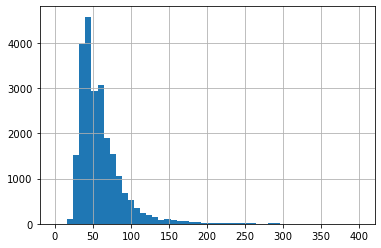

In [374]:
# построение гистограммы для столбца total_area
draw_hist('total_area', 0, 400)

Гистограмма по столбцу total_area выглядит правдоподобно. Очень мало квартир, площадь которых меньше 20 квадратных метров, а так же, начиная со 100 квадратных метров, с увеличением площади начинает заметно уменьшаться число квартир. Пик значений приходится где-то между 35 и 50 квадратными метрами

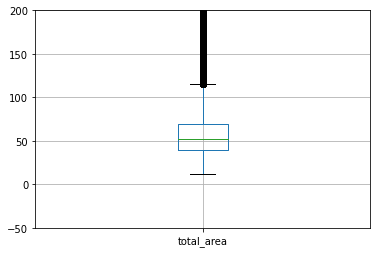

In [375]:
# построения диаграммы размаха для столбца total_area
draw_boxplot('total_area')

Разброс значений где-то между 15 и 120 квадратными метрами. Удалим выбивающиеся значения 

In [376]:
# замена датафрейма срезом по total_area от 15 до 120 квадратных метров
df = df.query('total_area>=15 and total_area<=120')

#### Столбец last_price

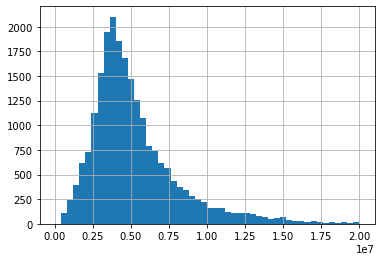

In [377]:
# построение гистограммы для столбца last_price
draw_hist('last_price', 0, 20000000)

По гистограмме можно сказать, что наибольшее количество квартир имеют стоимость где-то около 3 млн и не так много квартир стоят больше 9 млн.

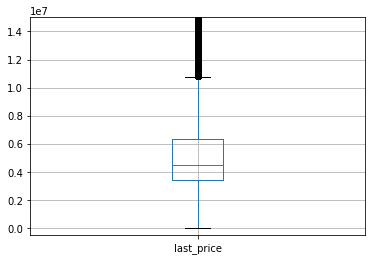

In [378]:
# построения диаграммы размаха для столбца last_price
draw_boxplot('last_price', -500000, 15000000)

Разброс значений где-то между 0 и 1.1.  Удалим выбивающиеся значения

In [379]:
# замена датафрейма срезом по last_price до 11000000
df = df.query('last_price>10000 and last_price<=11000000')

#### Столбец rooms

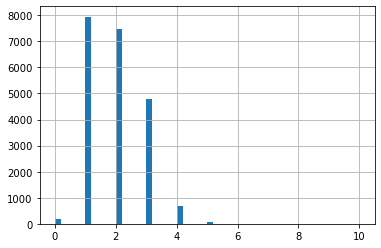

In [380]:
# построение гистограммы для столбца rooms
draw_hist('rooms', 0, 10)

По гистограмме видно, что основные значения - это от 1 до 3 комнат. Есть несколько квартир с 0 комнат - студии

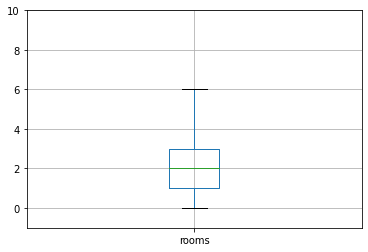

In [381]:
# построения диаграммы размаха для столбца rooms
draw_boxplot('rooms', -1, 10)

Разброс значений от 0 до 6. Оставим только их

In [382]:
# замена датафрейма срезом по rooms от 0 до 6.
df = df.query('rooms>=0 and rooms <= 6')

#### Столбец ceiling_height

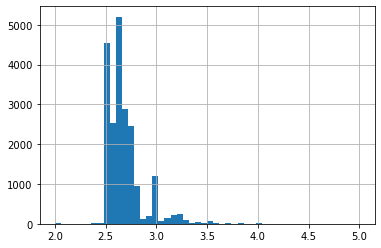

In [383]:
# построение гистограммы для столбца ceiling_height
draw_hist('ceiling_height', 2, 5)

Наибольшее число значений находится примерно от 2.5 до 2.7 м

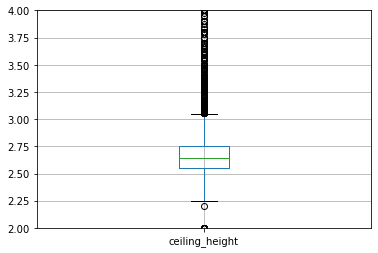

In [384]:
# построения диаграммы размаха для столбца ceiling_height
draw_boxplot('ceiling_height', 2, 4)

Выбросы значений меньше 2.25 и больше 3.1. Но нормальные значения для высоты потолков от 2.25 до 4.5

In [385]:
# замена датафрейма срезом по ceiling_height от 2.25 до 4.5.
df = df.query('ceiling_height>=2.25 and ceiling_height <=4.5')

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**
    
  Изучены основные параметры квартир -  площадь, цена, число комнат, высота потолков.
  А так же удалены из датафрейма квартиры с сильно выбивающимися значениями по этим параметрам

### Изучение времени продажи квартиры

Изучим время продажи квартиры. Опишем, сколько в среднем занимает продажа.

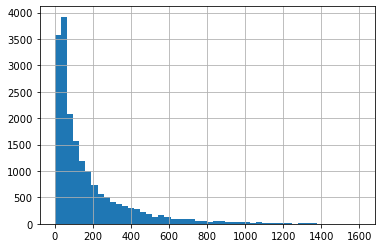

In [386]:
# построение гистограммы для столбца days_exposition
draw_hist('days_exposition', 0, 1600)

В целом, данные выглядят правдоподобно в том плане, что чем дольше висит объявление, тем меньше таких объявлений. Но пик значений у 0 - это неожиданно.

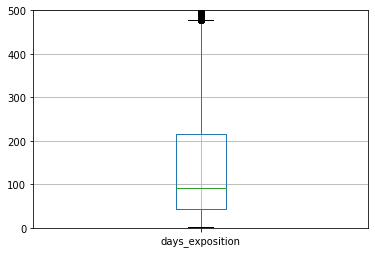

In [387]:
# построения диаграммы размаха для столбца days_exposition
draw_boxplot('days_exposition', 0, 500)

Значения распределены от 0 до 490.

Чтобы описать, сколько в среднем занимает продажа, посмотрим основные характеристики

In [388]:
# значение медианы по столцу days_exposition
df['days_exposition'].median()

91.0

In [389]:
# описание основных характеристик столбца days_exposition
df['days_exposition'].describe()

count    18576.000000
mean       171.600237
std        209.176197
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**

Итак, мы видим, что в среднем продажа квартиры занимает от 43 до 217 дней. Если продажа состоялась раньше, чем 43 дней, можно считать, что продажи прошли быстро, а если сделака сотоялась позднее, чем через 217 дней, то долго.

### Какие факторы больше всего влияют на стоимость квартиры

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади

Построим диаграмму рассеяния для цены в зависимости от площади

<AxesSubplot:xlabel='total_area'>

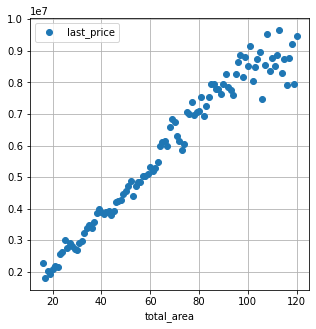

In [390]:
# построение диаграммы рассеяния для last_price в зависимости от total_area
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)



In [391]:
# посчитаем корреляцию
df[['last_price', 'price_per_square_meter', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,price_per_square_meter,total_area,rooms,city_centers_nearest
last_price,1.000000,0.617842,0.686474,0.436294,-0.342079
price_per_square_meter,0.617842,1.000000,-0.105128,-0.245108,-0.391080
total_area,0.686474,-0.105128,1.000000,0.807331,-0.114405
rooms,0.436294,-0.245108,0.807331,1.000000,-0.068268
city_centers_nearest,-0.342079,-0.391080,-0.114405,-0.068268,1.000000


Посмотрим теперь на цену за квадратный метр

<AxesSubplot:xlabel='total_area'>

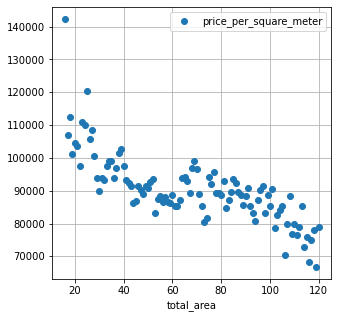

In [392]:
# построение диаграммы рассеяния
(
df.pivot_table(index='total_area', values='price_per_square_meter')
    .plot(grid=True, style='o', figsize=(5, 5))
)

Итак, чем больше площадь, тем выше цена квартиры

#### Зависимость цены от числа комнат


<AxesSubplot:xlabel='rooms'>

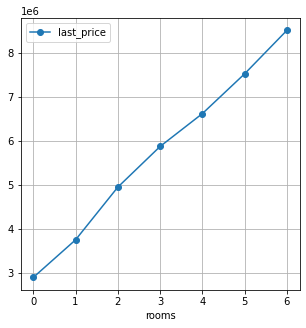

In [393]:
# построение диаграммы 
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Посмотрим на зависимость цены за квадратный метро от числа комнат

<AxesSubplot:xlabel='rooms'>

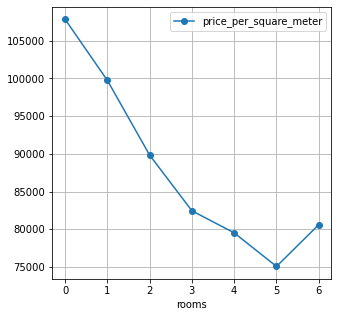

In [394]:
# построение диаграммы 
(
    df.pivot_table(index='rooms', values='price_per_square_meter')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Итак, чем больше комнат, тем больше цена, но корреляция этих параметров значительно ниже, чем для площади.
Так же с увеличением количества комнат цена за квадратный метр падает. Однако для 6 комнат она начинает расти - возможно, слишком дорогие квартиры.

#### Зависимость цены от удалённости от центра


Рассмотрим датафрейм, в котором нет нетипичных значений для city_centers_nearest

In [395]:
df1 = df.query('city_centers_nearest != -1')

<AxesSubplot:xlabel='city_centers_nearest'>

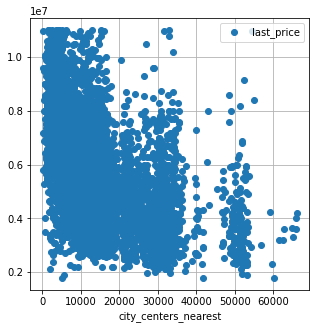

In [396]:
# построение диаграммы
(
    df1.pivot_table(index='city_centers_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

In [397]:
# подсчёт коэффициента корреляции
df1[['last_price', 'price_per_square_meter', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,price_per_square_meter,total_area,rooms,city_centers_nearest
last_price,1.000000,0.617842,0.686474,0.436294,-0.342079
price_per_square_meter,0.617842,1.000000,-0.105128,-0.245108,-0.391080
total_area,0.686474,-0.105128,1.000000,0.807331,-0.114405
rooms,0.436294,-0.245108,0.807331,1.000000,-0.068268
city_centers_nearest,-0.342079,-0.391080,-0.114405,-0.068268,1.000000


<AxesSubplot:xlabel='city_centers_nearest'>

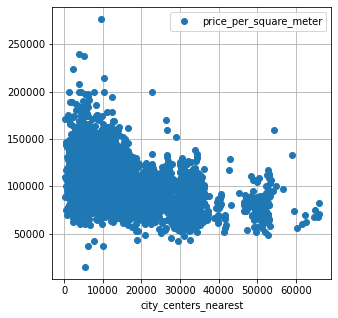

In [398]:
# построение диаграммы
(
    df1.pivot_table(index='city_centers_nearest', values='price_per_square_meter')
    .plot(grid=True, style='o', figsize=(5, 5))
)

Наиболее дорогие квартиры можно видеть в центре города. Хотя даже там встречаются и достаточно дешёвые квартиры.

#### Зависимость цены от этажа


<AxesSubplot:xlabel='floor_type'>

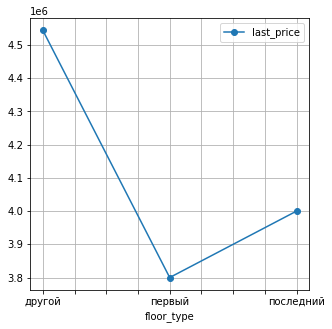

In [399]:
# построение диаграммы
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)   


Дешевле всего квартиры на 1 этаже. Немного дороже на последнем. Наиболее дорогими оказываются квартиры, находящиеся не на первом и не на последнем этаже.

#### Зависимость от дня размещения


<AxesSubplot:xlabel='exposition_weekday'>

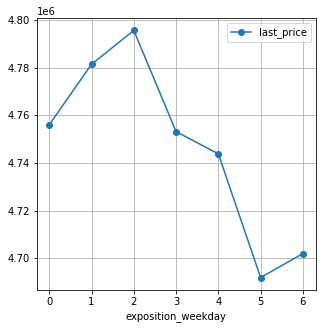

In [400]:
# построение диаграммы
(
    df.pivot_table(index='exposition_weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

В данном случае 0 обозначает понедельник. Дальше все дни идут подряд и 6 - воскресенье.
Сильной зависимости от дня недели не наблюдается

#### Зависимость от месяца размещения


<AxesSubplot:xlabel='exposition_month'>

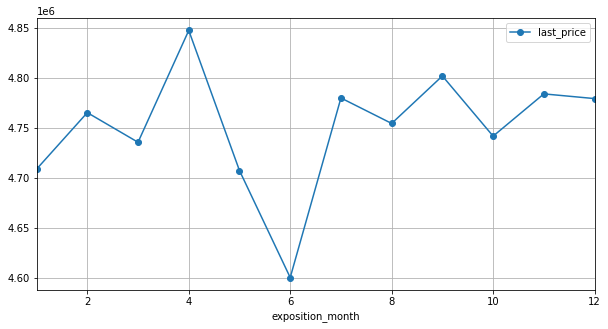

In [401]:
# построение диаграммы
(
    df.pivot_table(index='exposition_month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)

Итак, мы видим, что дешевле всего квартиры в объявлениях, выставленных в июне. Дороже всего в августе, сентябре и апреле. Но эта разница не столь велика, поэтому делать выводы про зависимость от месяца не стоит

#### Зависимость от года размещения

<AxesSubplot:xlabel='exposition_year'>

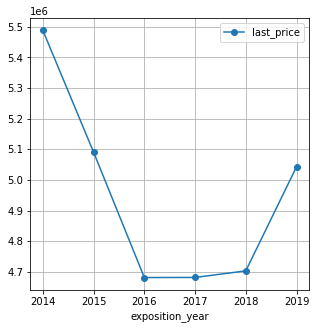

In [402]:
# построение диаграммы
(
    df.pivot_table(index='exposition_year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Мы видим спад цен на квартиры после 2015 года. Вероятно, это связано с экономическим кризисом. После 2018 года цены начинают расти

### Сравнение средней стоимости квадратного метра в топ-10 городов


Следующая задача. 
Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

Для начала сделаем срез датафрейма по столбцам locality_name и price_per_square_meter

In [403]:
# сохранение в переменной locality_price_per_square_meter среза датафрейма
# по столбцам locality_name и price_per_square_meter
locality_price_per_square_meter = df.loc[:, ['locality_name', 'price_per_square_meter']]
locality_price_per_square_meter

,locality_name,price_per_square_meter
1,посёлок Шушары,83750
2,Санкт-Петербург,92785
4,Санкт-Петербург,100000
5,городской посёлок Янино-1,96333
6,посёлок Парголово,100000
...,...,...
23692,Тихвин,45000
23693,Петергоф,74193
23695,Тосно,52542
23696,село Рождествено,43859


Теперь сделаем сводную таблицу с количеством значений и средним по price_per_square_meter

In [404]:
# сохранение в переменной locality_price_per_square_meter сводной таблицы по количеству значений и среднему значению
# по price_per_square_meter в зависимости от locality_name
locality_price_per_square_meter = locality_price_per_square_meter.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
locality_price_per_square_meter

,count,mean
,price_per_square_meter,price_per_square_meter
locality_name,,
Бокситогорск,10,17573.400000
Волосово,36,40141.750000
Волхов,110,35056.309091
Всеволожск,393,67277.381679
Выборг,230,58340.665217
...,...,...
село Путилово,2,40172.500000
село Рождествено,3,37696.333333


Переименуем для удобства столбцы

In [405]:
# переименование столбцов в таблице locality_price_per_square_meter
locality_price_per_square_meter.columns = ['count', 'mean_sq_m_price']

Составим топ-10 мест с наибольшей стоимостью

In [406]:
# вывод переменной top10_locality, в которой хранятся первые 10 значений 
# отсортированного по убыванию столбца count таблицы locality_price_per_square_meter
top10_locality = locality_price_per_square_meter.sort_values(by='count', ascending=False).head(10)
top10_locality

,count,mean_sq_m_price
locality_name,,
Санкт-Петербург,13374,105174.100194
посёлок Мурино,518,85672.861004
посёлок Шушары,438,78543.006849
Всеволожск,393,67277.381679
Пушкин,336,100270.854167
Колпино,335,75246.023881
посёлок Парголово,326,90334.024540
Гатчина,302,68652.552980
деревня Кудрово,298,92445.892617


Отобразим их на диаграмме

<AxesSubplot:ylabel='count'>

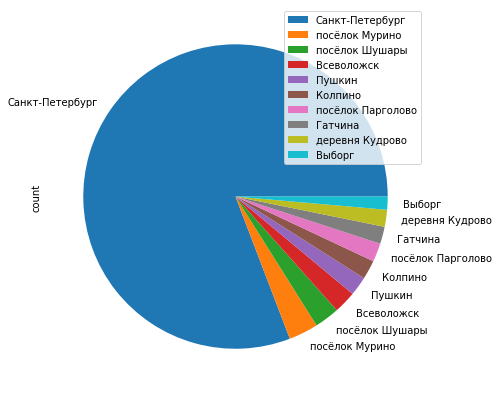

In [407]:
# построение диаграммы со значениями top10_locality
top10_locality.plot(y='count', kind='pie', figsize=(7, 7))

Итак, мы видим, где квартиры имеют наибольшую стоимость

Посмотрим на аналогичный список с наименьшей стоимостью

In [408]:
# вывод переменной top10_locality_min, в которой хранятся первые 10 значений 
# отсортированного по возрастанию столбца count таблицы locality_price_per_square_meter
top10_locality_min = locality_price_per_square_meter.sort_values(by='count', ascending=True).head(10)
top10_locality_min

,count,mean_sq_m_price
locality_name,,
поселок Жилпосёлок,1,32352.0
деревня Трубников Бор,1,37735.0
деревня Хапо-Ое,1,55882.0
деревня Чудской Бор,1,16129.0
деревня Шпаньково,1,27352.0
деревня Щеглово,1,56896.0
деревня Ялгино,1,17659.0
коттеджный поселок Кивеннапа Север,1,36363.0
коттеджный поселок Счастье,1,64583.0


Их также отобразим на диаграмме

<AxesSubplot:ylabel='count'>

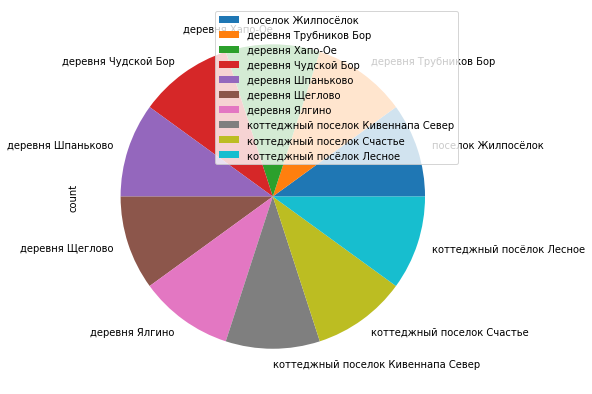

In [409]:
top10_locality_min.plot(y='count', kind='pie', figsize=(7, 7))

Итак, мы видим, где квартиры имеют наименьшую стоимость

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
   
  Наибольшая стоимость квартир в Санкт-Петербурге. Наименьшая из топ-10 в Выборге. 
    А самая дешёвая квартира из представленных в поселке Житково	


### Определение границы центра

Для начала выделим квартиры в Санкт-Петербурге, для которых дано расстояние до центра

In [410]:
# сохранение в переменной flats_in_spb среза датафрейма, в котором locality_name - это Санкт-Петербург
# и при этом в столбце city_centers_nearest нет нетипичного значения
flats_in_spb = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest != -1')

Теперь создадим столбец с расстоянием до центра в км, округлённым до целого

In [411]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
flats_in_spb['center_km'] = (flats_in_spb['city_centers_nearest'] / 1000).round()

<ipython-input-411-b9bf3306353a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_in_spb['center_km'] = (flats_in_spb['city_centers_nearest'] / 1000).round()


Построим график, где указана средняя стоимость для каждого км

<AxesSubplot:xlabel='center_km'>

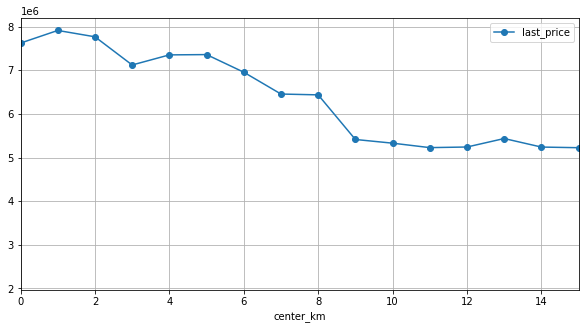

In [412]:
# построения графика
(
    flats_in_spb
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**
    
    
Мы видим, что начиная с 5 км цена начинает только снижаться. Обозначим это центральной зоной

### Анализ сегмента квартир в центре

Выделим сегмент квартир в центре

In [413]:
# сохранение в переменной flats_in_spb_center среза данных датафрейма, для которых locality_name - это Санкт-Петербург,
# расстояние меньше 5 и нет нетипичного значения в city_centers_nearest
flats_in_spb_center = flats_in_spb.query('locality_name == "Санкт-Петербург" and center_km <= 5 and city_centers_nearest != -1')

Изучим в данном сегменте следующие параметры: площадь, цена, число комнат, высота потолков

Реализуем функцию для построения гистограммы

In [414]:
# функция построения столбчатой диаграммы
def draw_hist_spb(col, xmin=0, xmax=7):
    flats_in_spb_center[col].hist(bins=50, range=(xmin,xmax))

#### Анализ площади

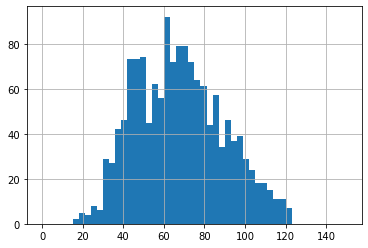

In [415]:
# построение столбчатой диаграммы для столбца total_area
draw_hist_spb('total_area', xmax=150)

Посмотрим основные характеристики площади квартир в Санкт-Петербурге с помощью метода describe()

In [416]:
# применение метода describe() для столбца total_area среза датафрейма по значению locality_name == "Санкт-Петербург"
df.query('locality_name == "Санкт-Петербург"')['total_area'].describe()

count    13374.000000
mean        53.764020
std         18.203403
min         16.000000
25%         40.000000
50%         50.000000
75%         65.000000
max        120.000000
Name: total_area, dtype: float64

Мы видим, что в среднем площадь от 40 до 65 квадратных метров.

Теперь проделаем аналогичную работу для сегмента в центре

In [417]:
# применеие метода describe() для столбца total_area таблицы flats_in_spb_center
flats_in_spb_center['total_area'].describe()

count    1461.000000
mean       67.156057
std        21.674814
min        16.000000
25%        50.000000
50%        66.000000
75%        82.000000
max       120.000000
Name: total_area, dtype: float64

Мы видим, что в среднем в центре Санкт-Петербурга площадь квартир от 50 до 82 квадратных метров.

Итак, площадь квартир в центре Санкт-Петербурга выше, чем на окраине

#### Анализ цены

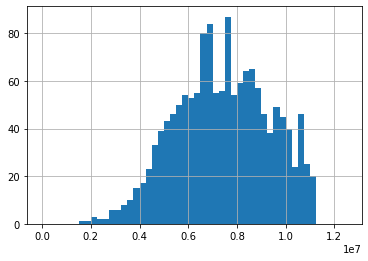

In [418]:
# построение столбчатой диаграммы для last_price
draw_hist_spb('last_price', xmax=12500000)

Посмотрим характеристики по last_price. Для удобства выведем в млн.

In [419]:
# применение метода describe() для среза по locality_name = Санкт-Петербург столбца last_price, 
# поделённого на млн
(df.query('locality_name == "Санкт-Петербург"')['last_price']/1000000).describe()

count    13374.000000
mean         5.555817
std          1.958471
min          0.012190
25%          4.049250
50%          5.100000
75%          6.700000
max         11.000000
Name: last_price, dtype: float64

Мы видим, что в среднем цена квартир в Санкт-Петербурге от 4 до 6.7 млн

In [420]:
# применение метода describe() для столбца last_price таблицы flats_in_spb_center,
# поделённого на млн
(flats_in_spb_center['last_price']/1000000).describe()

count    1461.000000
mean        7.399724
std         1.920962
min         1.600000
25%         6.000000
50%         7.450000
75%         8.900000
max        11.000000
Name: last_price, dtype: float64

Мы видим, что в среднем цена квартир в центре Санкт-Петербурга от 6 до 8.9 млн

Итак, цена квартир в центре Санкт-Петербурга выше, чем на окраине

#### Анализ количества комнат

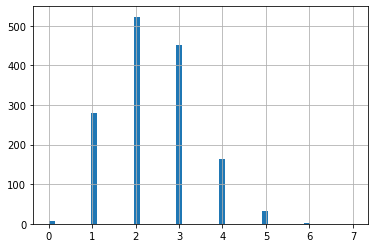

In [421]:
# построение столбчатой диаграммы для столбца rooms 
draw_hist_spb('rooms')

Посмотрим характеристики по rooms.

In [422]:
# применение метода describe() для столбца rooms среза датафрейма по locality_name = "Санкт-Петербург"
df.query('locality_name == "Санкт-Петербург"')['rooms'].describe()

count    13374.000000
mean         1.949978
std          0.909234
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Мы видим, что в среднем в Санкт-Петербурге в квартирах от 1 до 3 комнат. посмотрим медиану

In [423]:
# медиана для столбца rooms среза датафрейма по locality_name = "Санкт-Петербург"
df.query('locality_name == "Санкт-Петербург"')['rooms'].median()

2.0

В среднем в Санкт-Петербурге в квартирах 2 комнаты

Посмотрим данные по центральной части

In [424]:
# применение метода describe() для столбца rooms таблицы flats_in_spb_center
flats_in_spb_center['rooms'].describe()

count    1461.000000
mean        2.403833
std         1.014868
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

Мы видим, что в среднем в центре Санкт-Петербурга в квартирах от 2 до 3 комнат. посмотрим медиану

In [425]:
# медиана для столбца rooms таблицы flats_in_spb_center
flats_in_spb_center['rooms'].median()

2.0

Медиана тоже равна 2. 

Несмотря на то, что медианное значение совпадает, можно сказать, что в центре в квартирах больше комнат, поскольку нижний квантиль смещён с 1 до 2. 

#### Анализ высоты потолков

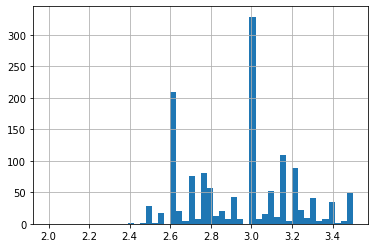

In [426]:
# построение столбчатой диаграммы для столбца ceiling_height
draw_hist_spb('ceiling_height', xmin=2, xmax=3.5)

In [427]:
# применение метода describe() для среза по locality_name == "Санкт-Петербург" столбца ceiling_height
df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].describe()

count    13374.000000
mean         2.701367
std          0.209339
min          2.300000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.500000
Name: ceiling_height, dtype: float64

Мы видим, что в среднем высота потолков в Санкт-Петербурге от 2.55 до 2.75 м

Посмотрим на характеристики столбца  ceiling_height в центральной части

In [428]:
# применение метода describe() для столбца ceiling_height таблицы flats_in_spb_center
flats_in_spb_center['ceiling_height'].describe()

count    1461.000000
mean        2.986622
std         0.315751
min         2.400000
25%         2.730000
50%         3.000000
75%         3.150000
max         4.370000
Name: ceiling_height, dtype: float64

В центре города высота потолков в среднем составляет от 2.7 до 3.15 метров

Итого, в центре города потолки выше, чем на окраине

#### Выделение факторов, влияющих на стоимость квартиры в центре

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Проделаем аналогичную работу, как со всем датафреймом, только с квартирами в центре Санкт-Петербурга

##### Число комнат

<AxesSubplot:xlabel='rooms'>

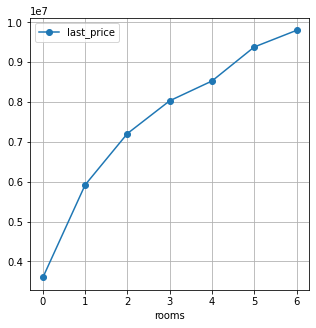

In [429]:
# построение диаграммы 
(
    flats_in_spb_center.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

In [430]:
# подсчёт корреляции
flats_in_spb_center[['last_price', 'price_per_square_meter', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,price_per_square_meter,total_area,rooms,city_centers_nearest
last_price,1.000000,0.146993,0.673392,0.470121,-0.061535
price_per_square_meter,0.146993,1.000000,-0.589698,-0.561540,0.087639
total_area,0.673392,-0.589698,1.000000,0.799232,-0.104268
rooms,0.470121,-0.561540,0.799232,1.000000,-0.122102
city_centers_nearest,-0.061535,0.087639,-0.104268,-0.122102,1.000000


<AxesSubplot:xlabel='rooms'>

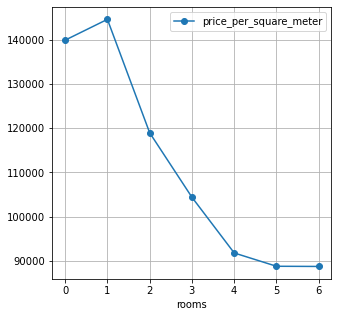

In [431]:
# построение диаграммы 
(
    flats_in_spb_center.pivot_table(index='rooms', values='price_per_square_meter')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Итак, мы видим, что корреляция между общей стоимостью и количеством комнат в центре города ниже, чем по всему городу. Это может быть связано с большим ценовым разбросом в центре. Однако цена квадратного метра в центре сильнее зависит от количества комнат, чем по городу.  С увеличением количества комнат в квартире стоимость квадратного метра уменьшается.

##### Этаж

<AxesSubplot:xlabel='floor_type'>

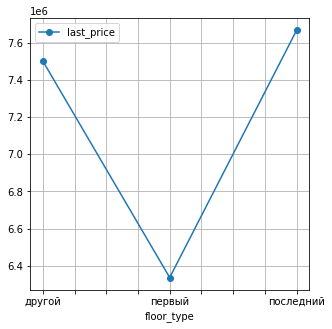

In [432]:
# построение диаграммы
(
    flats_in_spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)   


Итак, мы видим, что, как и для всего города, для центра Санкт-Петербурга этаж влияет на стоимость квартиры. Однако, в отличие от наблюдений по графику по всему городу, смотря на сегмент квартир в центре, мы видим, что квартиры на последнем этаже стоят настолько же дорого, как и на любом другом (не первом). На первом этаже мы видим снова спад цены

##### Удалённость от центра

<AxesSubplot:xlabel='city_centers_nearest'>

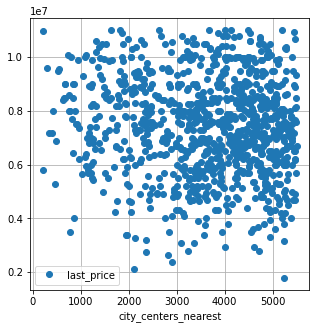

In [433]:
# построение диаграммы
(
    flats_in_spb_center.pivot_table(index='city_centers_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

<AxesSubplot:xlabel='city_centers_nearest'>

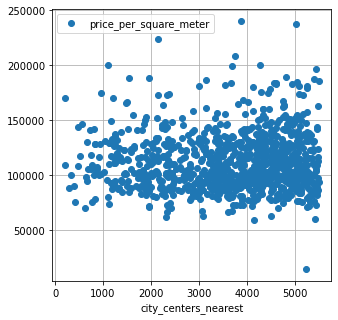

In [434]:
# построение диаграммы
(
    flats_in_spb_center.pivot_table(index='city_centers_nearest', values='price_per_square_meter')
    .plot(grid=True, style='o', figsize=(5, 5))
)

Мы видим, что зависимости стоимости квартир от удалённости от центра в центральной части Санкт-Петербурга практически не наблюдается

##### День недели размещения объявления

<AxesSubplot:xlabel='exposition_weekday'>

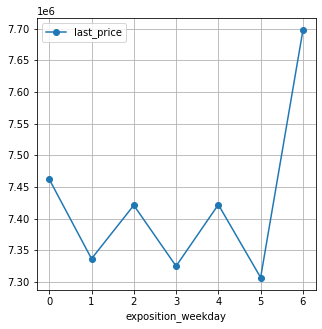

In [435]:
# построение диаграммы
(
    flats_in_spb_center.pivot_table(index='exposition_weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Мы видим обратную ситуацию - в объявлениях, размещённых в воскресенье стоимость квартир выше, чем в в объявлениях, размещённых в будни. Но опять же зависимость не сильно большая

##### Месяц размещения объявления

<AxesSubplot:xlabel='exposition_month'>

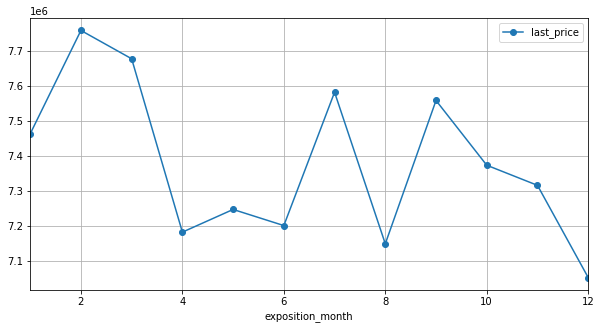

In [436]:
# построение диаграммы
(
    flats_in_spb_center.pivot_table(index='exposition_month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)

Мы видим пик цены в июле и феврале и, наоборот, в отличие от распределения по всему городу, спад цены в апреле. Однако разница всё равно не такая большая

##### Год размещения объявления

<AxesSubplot:xlabel='exposition_year'>

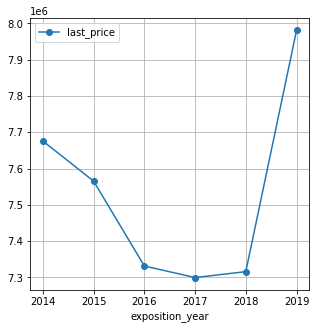

In [437]:
# построение диаграммы
(
    flats_in_spb_center.pivot_table(index='exposition_year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Мы видим спад стоимости квартир в центре в 2017 и заметный рост после 2018.

## Общий вывод

Итак, на этапе предобработки данных мы:
 * Заполнили пропуски.
 * Привели данные к нужным типам
 * Добавили нужные столбцы
 * Изучили основные параметры и удалили выбросы

Выводы:  
* Продажа квартиры занимает в среднем от 43 до 217 дней.
* Наибольшая стоимость квартир в Санкт-Петербурге. Наименьшая стоимость в выделенных топ-10 в Выборге. Самую дешёвую квартиру удалось найти в посёлке Житково

* Центральная зона Санкт-Петербурга, исходя из датафрейма, в пределах 5 км.

* В центре Санкт-Петербурга площадь квартир, цена квартир, количество комнат, высота потолков больше, чем если смотреть по всему городу.

Факторы влияющие на продажу квартиры:
  * Чем больше площадь, тем больше цена квартиры
  * Корреляция с числом комнат ниже.
  * Но в центральной части Санкт-Петербурга с увеличением количества комнат стоимость квадратного метра уменьшается
  * В центре дорогие квартиры, но есть и дешёвые
  * Дешевле всего квартиры на 1 этаже. На последнем - цена средняя. Остальные дороже.
  * Однако в центральной части Санкт-Петербурга нет разницы в цене между квартирами на последнем и на другом (не первом) этаже.
  
  
  
  * В целом, по полученным параметрам можно строить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.